In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

In [2]:
ratings_data = pd.read_csv('ratings.csv')

ratings_data = ratings_data.drop(columns=['timestamp'])

train_data, test_data = train_test_split(ratings_data, test_size=0.1, random_state=42)

train_data.to_csv('ratings_training_90.csv', index=False)
test_data.to_csv('ratings_test_10.csv', index=False)

In [3]:
def unweighted_prediction(train_data, test_data, k):
    # Using KNN regressor for unweighted prediction
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    # Fit the model
    knn.fit(train_data[['userId', 'movieId']], train_data['rating'])
    # Make predictions
    predictions = knn.predict(test_data[['userId', 'movieId']])
    return predictions

def weighted_prediction(train_data, test_data, k):
    # Using KNN regressor for weighted prediction
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    # Fit the model
    knn.fit(train_data[['userId', 'movieId']], train_data['rating'])
    # Make predictions
    predictions = knn.predict(test_data[['userId', 'movieId']])
    return predictions

def calculate_rmse(predictions, actual):
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    return rmse

In [4]:
k_values = [3, 5, 10]

rmse_unweighted_list = []
rmse_weighted_list = []
runtimes = []

for k in k_values:
    
    start_time = time.time() # Record Start time
    
    # Unweighted predictions
    unweighted_preds = unweighted_prediction(train_data, test_data, k)
    # Weighted predictions
    weighted_preds = weighted_prediction(train_data, test_data, k)
    
    end_time = time.time()  # Record end time
    runtime = end_time - start_time  # Calculate runtime
    runtimes.append(runtime)
    
    # Create separate DataFrames for unweighted and weighted predictions
    unweighted_results_df = pd.DataFrame({
        'userID': test_data['userId'],
        'movieID': test_data['movieId'],
        'realRating': test_data['rating'],
        'predictedRating': unweighted_preds.round(1)
    })
    
    weighted_results_df = pd.DataFrame({
        'userID': test_data['userId'],
        'movieID': test_data['movieId'],
        'realRating': test_data['rating'],
        'predictedRating': weighted_preds.round(1)
    })
    
    # Save unweighted predictions to a CSV file
    unweighted_results_df.to_csv(f'ratings_predictions_10_knn_uw_k{k}.csv', index=False)
    
    # Save weighted predictions to a CSV file
    weighted_results_df.to_csv(f'ratings_predictions_10_knn_wt_k{k}.csv', index=False)
    
    
    # Calculate accuracy and RMSE for unweighted predictions with k
    rmse_unweighted = calculate_rmse(unweighted_preds, test_data['rating'])
    rmse_unweighted_list.append(rmse_unweighted)
    
    # Calculate accuracy and RMSE for weighted predictions with k
    rmse_weighted = calculate_rmse(weighted_preds, test_data['rating'])
    rmse_weighted_list.append(rmse_weighted)
    
    print(f'K = {k}:')
    print(f'Unweighted Method - RMSE: {rmse_unweighted:.2f}')
    print(f'Weighted Method - RMSE: {rmse_weighted:.2f}')
    print(f'Runtime: {runtime:.2f} seconds')


K = 3:
Unweighted Method - RMSE: 1.12
Weighted Method - RMSE: 1.13
Runtime: 0.36 seconds
K = 5:
Unweighted Method - RMSE: 1.07
Weighted Method - RMSE: 1.08
Runtime: 0.43 seconds
K = 10:
Unweighted Method - RMSE: 1.04
Weighted Method - RMSE: 1.05
Runtime: 0.45 seconds


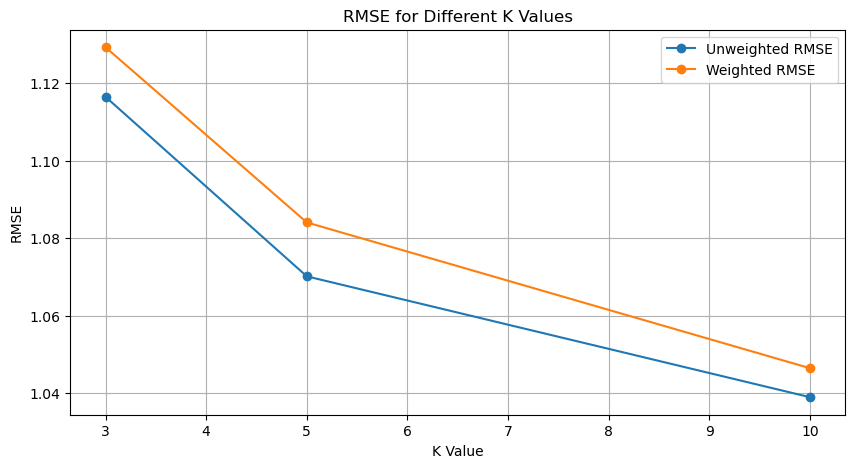

In [5]:
# Plot RMSE for Unweighted and Weighted Predictions
plt.figure(figsize=(10, 5))
plt.plot(k_values, rmse_unweighted_list, marker='o', label='Unweighted RMSE')
plt.plot(k_values, rmse_weighted_list, marker='o', label='Weighted RMSE')
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.title('RMSE for Different K Values')
plt.legend()
plt.grid(True)
plt.show()

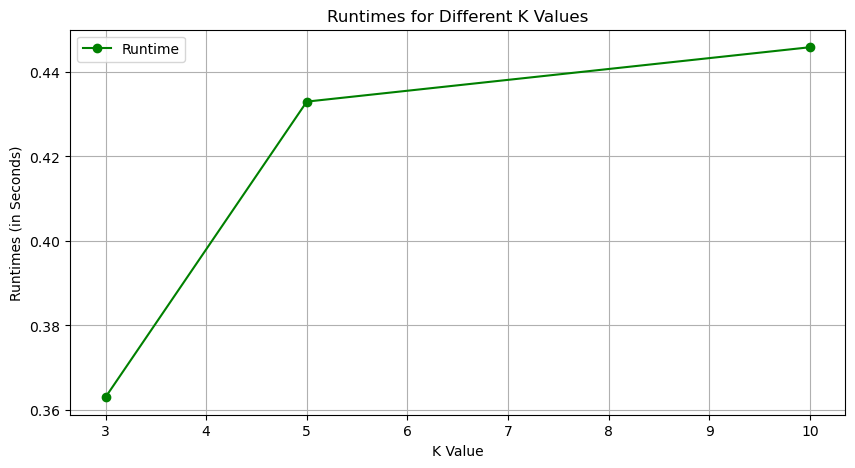

In [6]:
# Plot Runtimes for different K values
plt.figure(figsize=(10, 5))
plt.plot(k_values, runtimes, marker='o', label='Runtime', color='green')
plt.xlabel('K Value')
plt.ylabel('Runtimes (in Seconds)')
plt.title('Runtimes for Different K Values')
plt.legend()
plt.grid(True)
plt.show()